In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df=pd.read_csv("bigmartTrain.csv")
train_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
test_df=pd.read_csv("bigmartTest.csv")
test_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [4]:
train_df.shape,test_df.shape

((8523, 12), (5681, 11))

In [84]:
train_df['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

# handling missing values

In [5]:
#check train_df has any missing data
train_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
train_df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
#print the missing values columns
miss_values=train_df['Item_Weight'].isnull().sum()
print('missing values is:',miss_values)

missing values is: 1463


In [8]:
miss_values=train_df['Outlet_Size'].isnull().sum()
print('missing values is:',miss_values)

missing values is: 2410


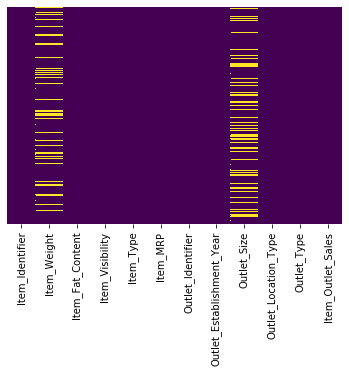

In [9]:
#grpahical representation of missing values use seaborn library
sns.heatmap(data=train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
#handling the missing data train_df
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [11]:
#fill the missing columns
train_df['Item_Weight']=train_df['Item_Weight'].fillna(train_df['Item_Weight'].mean())
train_df['Outlet_Size']=train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode()[0])

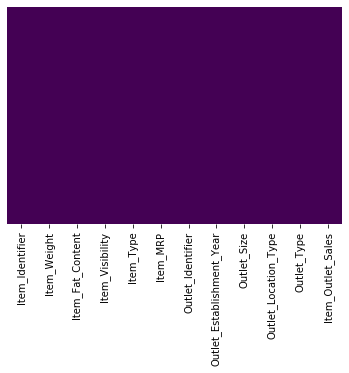

In [12]:
#grpahical representation of missing values use seaborn library
sns.heatmap(data=train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
#check test_df has any missing data
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [14]:
#here also Item_Weight and Outlet_Size columns has some values are missig


In [15]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [16]:
test_df['Item_Weight']=test_df['Item_Weight'].fillna(test_df['Item_Weight'].mean())
test_df['Outlet_Size']=train_df['Outlet_Size'].fillna(train_df['Outlet_Size'].mode()[0])

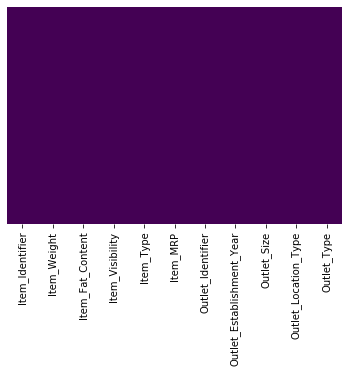

In [17]:
#grpahical representation of missing values use seaborn library
sns.heatmap(data=test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# EDA( Exploratory Data Analysis)

In [18]:
#combine both testing and training data
bigmart_df=pd.concat([train_df,test_df],sort=True)
bigmart_df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


bigmart_df.columns

In [19]:
#count the number of entries in each columns
bigmart_df.count()

Item_Fat_Content             14204
Item_Identifier              14204
Item_MRP                     14204
Item_Outlet_Sales             8523
Item_Type                    14204
Item_Visibility              14204
Item_Weight                  14204
Outlet_Establishment_Year    14204
Outlet_Identifier            14204
Outlet_Location_Type         14204
Outlet_Size                  14204
Outlet_Type                  14204
dtype: int64

In [20]:
#display the details of Diary product
bigmart_df[(bigmart_df.Item_Type=='Dairy')]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300000,1999,OUT049,Tier 1,Medium,Supermarket Type1
11,Regular,FDA03,144.1102,2187.1530,Dairy,0.045464,18.500000,1997,OUT046,Tier 1,Small,Supermarket Type1
19,Low Fat,FDU02,230.5352,2748.4224,Dairy,0.102492,13.350000,2004,OUT035,Tier 2,Small,Supermarket Type1
28,Regular,FDE51,45.5086,178.4344,Dairy,0.161467,5.925000,1998,OUT010,Tier 3,Medium,Grocery Store
30,Low Fat,FDV38,55.7956,163.7868,Dairy,0.170349,19.250000,1998,OUT010,Tier 3,Medium,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...,...
5620,Low Fat,FDB15,265.0568,NaN,Dairy,0.137088,10.895000,2002,OUT045,Tier 2,Medium,Supermarket Type1
5631,Regular,FDA03,147.1102,NaN,Dairy,0.045556,18.500000,2002,OUT045,Tier 2,Medium,Supermarket Type1
5649,Low Fat,DRH03,94.7120,NaN,Dairy,0.035135,17.250000,2002,OUT045,Tier 2,Medium,Supermarket Type1
5656,Low Fat,FDC39,207.8296,NaN,Dairy,0.158425,12.695633,1985,OUT027,Tier 3,Small,Supermarket Type3


In [21]:
#display the details of Baking foods and Frozen Foods
bigmart_df[(bigmart_df.Item_Type=='Baking Goods')|(bigmart_df.Item_Type=='Frozen Foods')]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395000,2009,OUT018,Tier 3,Medium,Supermarket Type2
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200000,2002,OUT045,Tier 2,Medium,Supermarket Type1
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200000,2007,OUT017,Tier 2,Medium,Supermarket Type1
21,Regular,FDW12,144.5444,4064.0432,Baking Goods,0.035400,12.857645,1985,OUT027,Tier 3,Medium,Supermarket Type3
23,Low Fat,FDC37,107.6938,214.3876,Baking Goods,0.057557,12.857645,1985,OUT019,Tier 1,Small,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...,...
5617,Regular,FDW16,93.2804,NaN,Frozen Foods,0.041643,17.350000,2009,OUT018,Tier 3,Medium,Supermarket Type2
5623,LF,FDG16,214.4192,NaN,Frozen Foods,0.090183,15.250000,2009,OUT018,Tier 3,Medium,Supermarket Type2
5633,Regular,FDM12,187.8214,NaN,Baking Goods,0.069859,16.700000,1987,OUT013,Tier 3,Small,Supermarket Type1
5640,Regular,FDI60,62.8510,NaN,Baking Goods,0.038136,12.695633,1985,OUT027,Tier 3,Small,Supermarket Type3


In [22]:
#count the number of outlet established based on year
bigmart_df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

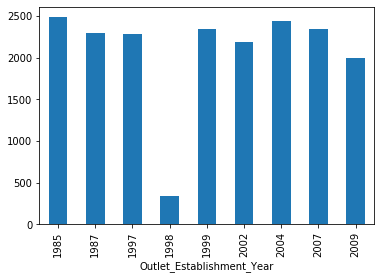

In [23]:
#visualization of Item_Outlet_Sales based on Outlet_Establishment_Year
bigmart_df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

In [24]:
#visualization of no of item sold 
bigmart_df.groupby('Item_Type')['Item_Outlet_Sales'].sum()

Item_Type
Baking Goods             1.265525e+06
Breads                   5.532372e+05
Breakfast                2.322990e+05
Canned                   1.444151e+06
Dairy                    1.522594e+06
Frozen Foods             1.825735e+06
Fruits and Vegetables    2.820060e+06
Hard Drinks              4.577934e+05
Health and Hygiene       1.045200e+06
Household                2.055494e+06
Meat                     9.175656e+05
Others                   3.255176e+05
Seafood                  1.488682e+05
Snack Foods              2.732786e+06
Soft Drinks              8.928977e+05
Starchy Foods            3.514013e+05
Name: Item_Outlet_Sales, dtype: float64

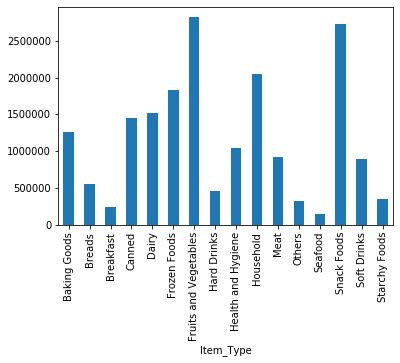

In [25]:
bigmart_df.groupby('Item_Type')['Item_Outlet_Sales'].sum().plot.bar()

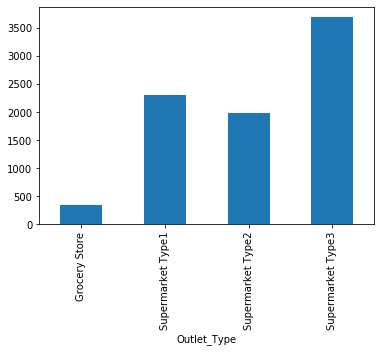

In [26]:
#visualize total number of sales in each outlet
bigmart_df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot.bar()

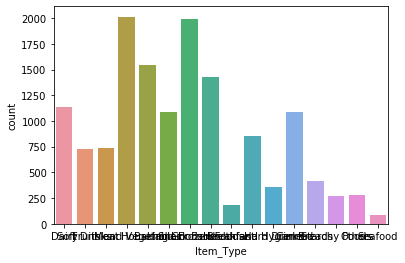

In [27]:
#using seaborn visualize Item_Type 
sns.countplot(x='Item_Type',data=bigmart_df)

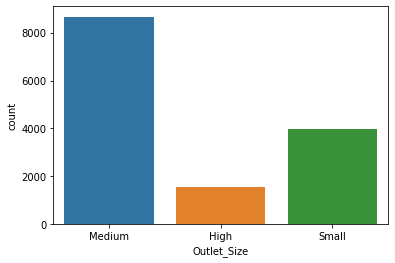

In [28]:
#using seaborn visualize Outlet_Size
sns.countplot(x='Outlet_Size',data=bigmart_df)

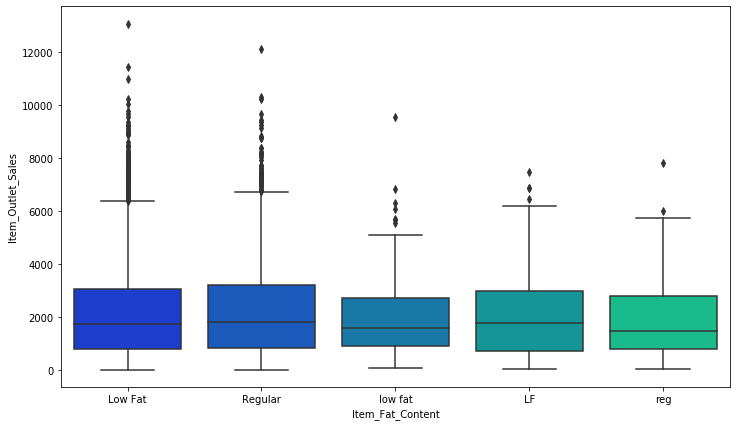

In [29]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=bigmart_df,palette='winter')

In [30]:
#list item identifier of Item_Fat_Content
bigmart_df.groupby('Item_Fat_Content')['Item_Identifier'].value_counts()

Item_Fat_Content  Item_Identifier
LF                FDR47              4
                  DRG36              3
                  FDJ41              3
                  FDQ16              3
                  FDT02              3
                                    ..
reg               FDZ26              1
                  FDZ28              1
                  FDZ32              1
                  FDZ35              1
                  FDZ59              1
Name: Item_Identifier, Length: 2311, dtype: int64

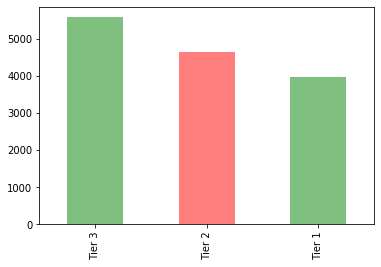

In [31]:
#visualization number of outlet location type
bigmart_df['Outlet_Location_Type'].value_counts().plot(kind='bar',alpha=0.5,color=['g','r'])

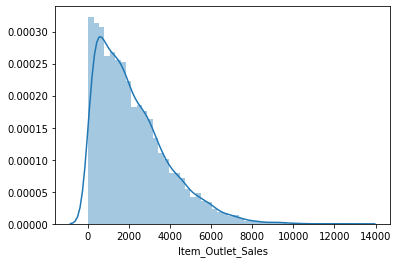

In [32]:
sns.distplot(train_df["Item_Outlet_Sales"])

In [33]:
#check skewness and kurtosis 
skewValue = train_df['Item_Outlet_Sales'].skew()
print(skewValue)

1.1775306028542798


In [34]:
#highly skewed

In [35]:
kurtosis=train_df['Item_Outlet_Sales'].kurt()
kurtosis

1.6158766814287264

# Feature Engineering

In [36]:
bigmart_df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [37]:
##remove Item_outlet_Sales columns from train data..because this column is our target
bigmart_df.drop(["Item_Outlet_Sales"],axis=1,inplace=True)

In [38]:
#create dummy variable for Item_Fat_Content,Item_Type,Outlet_Location_Type, Outlet_Size,Outlet_Type
df1=pd.get_dummies(bigmart_df['Item_Fat_Content'],drop_first=True,prefix='Item_Fat_Content')
df2=pd.get_dummies(bigmart_df['Item_Type'],drop_first=True,prefix='Item_Type')
df3=pd.get_dummies(bigmart_df['Outlet_Location_Type'],drop_first=True,prefix='Outlet_Location_Type')


In [39]:
bigmart_df['Outlet_Type'].value_counts()

Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3    1559
Supermarket Type2    1546
Name: Outlet_Type, dtype: int64

In [40]:
df4=pd.get_dummies(bigmart_df['Outlet_Type'],drop_first=True,prefix='Outlet_Type')

In [41]:
df4

,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,0
4,1,0,0
...,...,...,...
5676,1,0,0
5677,0,1,0
5678,1,0,0
5679,1,0,0


In [42]:
#drop unwanted columns sucha as Item_Fat_Content,Item_Type,Outlet_Location_Type, Outlet_Size,Outlet_Type

In [43]:
bigmart_df.drop(["Item_Fat_Content","Item_Type","Outlet_Location_Type", "Outlet_Size","Outlet_Type"],inplace=True,axis=1)

In [44]:
bigmart_df["Item_Identifier"].value_counts()

FDV20    10
FDB20    10
DRG49    10
FDX32    10
NCF30    10
         ..
FDM52     7
FDI46     7
FDR51     7
FDL50     7
NCL42     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [45]:
#process Item_Identifier:romove all digits from Item_Identifier  

In [46]:
def processitem(t):
    no_digits = []
    for i in t:
        if not i.isdigit():
            no_digits.append(i)        

    result = ''.join(no_digits)
    return result    
    


In [47]:
bigmart_df["Item_Identifier"]=bigmart_df["Item_Identifier"].map(processitem)

In [48]:
bigmart_df["Item_Identifier"]

0       FDA
1       DRC
2       FDN
3       FDX
4       NCD
       ... 
5676    FDB
5677    FDD
5678    NCO
5679    FDJ
5680    FDU
Name: Item_Identifier, Length: 14204, dtype: object

In [49]:
#create dummy variables for Item_Identifier
df5=pd.get_dummies(bigmart_df['Item_Identifier'],drop_first=True,prefix='Item_Identifier')

In [50]:
df5

,Item_Identifier_DRB,Item_Identifier_DRC,Item_Identifier_DRD,Item_Identifier_DRE,Item_Identifier_DRF,Item_Identifier_DRG,Item_Identifier_DRH,Item_Identifier_DRI,Item_Identifier_DRJ,Item_Identifier_DRK,...,Item_Identifier_NCQ,Item_Identifier_NCR,Item_Identifier_NCS,Item_Identifier_NCT,Item_Identifier_NCU,Item_Identifier_NCV,Item_Identifier_NCW,Item_Identifier_NCX,Item_Identifier_NCY,Item_Identifier_NCZ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
#remove Item_Identifier from bigmart_df
bigmart_df.drop(['Item_Identifier'],inplace=True,axis=1)

In [52]:
bigmart_df["Outlet_Identifier"].value_counts()

OUT027    1559
OUT013    1553
OUT046    1550
OUT035    1550
OUT049    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

In [53]:
#create dummy variables for Outlet_Identifier
df6=pd.get_dummies(bigmart_df['Outlet_Identifier'],drop_first=True,prefix='Outlet_Identifier')

In [54]:
df6

,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
5676,0,0,0,0,0,0,0,1,0
5677,0,0,1,0,0,0,0,0,0
5678,0,0,0,0,0,0,1,0,0
5679,0,1,0,0,0,0,0,0,0


In [55]:
#remove Outlet_Identifier from bigmart_df
bigmart_df.drop(['Outlet_Identifier'],inplace=True,axis=1)

In [56]:
#compine all dummy dataframes such as df1,df2,df3,df4.df5,df6
final_df=pd.concat([bigmart_df,df1,df2,df3,df4,df5,df6],axis=1)

In [57]:
final_df.head()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Item_Identifier_NCZ,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,249.8092,0.016047,9.30,1999,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,48.2692,0.019278,5.92,2009,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,141.6180,0.016760,17.50,1999,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,182.0950,0.000000,19.20,1998,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,53.8614,0.000000,8.93,1987,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [58]:
final_df.dtypes

Item_MRP                     float64
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Item_Fat_Content_Low Fat       uint8
                              ...   
Outlet_Identifier_OUT027       uint8
Outlet_Identifier_OUT035       uint8
Outlet_Identifier_OUT045       uint8
Outlet_Identifier_OUT046       uint8
Outlet_Identifier_OUT049       uint8
Length: 107, dtype: object

# Training, Evaluation and Prediction

In [59]:
train_data = final_df.iloc[:8523]
test_data = final_df.iloc[8523:]

In [60]:
train_data.head()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Item_Identifier_NCZ,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,249.8092,0.016047,9.30,1999,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,48.2692,0.019278,5.92,2009,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,141.6180,0.016760,17.50,1999,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,182.0950,0.000000,19.20,1998,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,53.8614,0.000000,8.93,1987,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [61]:
test_data.head()

,Item_MRP,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Item_Identifier_NCZ,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049
0,107.8622,0.007565,20.750000,1999,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,87.3198,0.038428,8.300000,2007,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,241.7538,0.099575,14.600000,1998,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,155.0340,0.015388,7.315000,2007,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,234.2300,0.118599,12.695633,1985,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [62]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [63]:
X=train_data
y=train_df['Item_Outlet_Sales']

In [64]:
#split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6392, 107)
(2131, 107)
(6392,)
(2131,)


# Building a model

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
LR=LinearRegression()
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
# make class predictions for X_test
y_pred=LR.predict(X_test)
print(y_pred)

[2113.75 2369.5  2285.   ... 2581.25  826.25 2275.25]


In [69]:
#actual values
y_test

4931    1426.1436
4148    1201.7690
7423    1836.2764
4836    2410.8618
944     1549.9824
          ...    
2310    2067.3090
2229    4933.5780
6546    3139.9128
7652    1062.6168
7811    4170.5712
Name: Item_Outlet_Sales, Length: 2131, dtype: float64

In [70]:
#accuracy score 
LR.score(X_test,y_test)

0.5551763586489329

In [71]:
#apply xgboost algrithm
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train,y_train)

C:\Users\sathi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:46:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [72]:
y_predct=classifier.predict(X_test)
print(y_predct)

[2486.2224 1851.0602 2216.1086 ... 2760.7532  779.0274 2357.1616]


In [73]:
classifier.score(X_test,y_test)

0.5907279686404171

In [74]:
# we have already a test data..we can apply test_data  to check the accuaracy of a predicted model

In [75]:
X_train=train_data
y_train=train_df['Item_Outlet_Sales']
y_test=test_data


In [76]:
classifier.fit(X_train,y_train)

C:\Users\sathi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\sathi\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[10:47:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [77]:
# make class predictions for test_data
y_predtn=classifier.predict(y_test)
print(y_predtn)

[1631.7786 1430.7207 1185.6256 ... 1821.696  3777.447  1305.2772]


In [78]:
#upload sample submission file
sample_df=pd.read_csv("Submission.csv")
sample_df

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1631.7786
1,FDW14,OUT017,1430.7207
2,NCN55,OUT010,1185.6256
3,FDQ58,OUT017,2614.8530
4,FDY38,OUT027,6072.0806
...,...,...,...
5676,FDB58,OUT046,2097.2363
5677,FDD47,OUT018,2249.6380
5678,NCO17,OUT045,1821.6960
5679,FDJ26,OUT017,3777.4470


In [79]:
#adding predicted Item_Outlet_Sales in to sample_df
pred=pd.DataFrame(y_predtn)
data=pd.concat([sample_df[["Item_Identifier","Outlet_Identifier"]],pred],axis=1)

data.columns=["Item_Identifier","Outlet_Identifier",'Item_Outlet_Sales']
data.to_csv('Submission.csv',index=False)

In [80]:
sample_df1=pd.read_csv("Submission.csv")
sample_df1

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1631.7786
1,FDW14,OUT017,1430.7207
2,NCN55,OUT010,1185.6256
3,FDQ58,OUT017,2614.8530
4,FDY38,OUT027,6072.0806
...,...,...,...
5676,FDB58,OUT046,2097.2363
5677,FDD47,OUT018,2249.6380
5678,NCO17,OUT045,1821.6960
5679,FDJ26,OUT017,3777.4470
